In [1]:
from solver import Solver
from model import Net
from dataset import RotationDataset
from torch.utils.data import DataLoader
import torch
import numpy as np
from coordinate_transformation import euclidean_to_spherical, spherical_to_euclidean
import math
import time
import lossfn
from experiment import run_experiment, run_experiment_variable_loss, run_experiment_augmented_lagrangian, run_experiment_augmented_lagrangian_auto
import matplotlib.pyplot as plt

In [2]:
SEED_TEST = 0

In [3]:
def plot_train_loss(dim, paths, logscale=True, labels=[], includeTest=False):
    plt.figure(figsize=(13,7))
    if len(labels) == 0:
        labels = [''] * len(paths)
    for path, label in zip(paths, labels):
        # Plot train loss
        model = Net(dim, n_hidden_layers=max(1, int(math.log(dim, 2))))
        solver = Solver(model)
        solver.load_checkpoint(path)
        # if "gradient_norm" in 
        # plt.plot(solver.hist["iterations"], solver.hist["gradient_norm"], label='grad_'+label)
        for key in solver.hist["individual_train_losses"]:
            plt.plot(solver.hist["iterations"], solver.hist["individual_train_losses"][key], label=str(key)+'_'+str(label))
        if includeTest:
            plt.plot(solver.hist["iterations"], solver.hist["test_loss"], label='test_'+str(label))
    plt.legend()
    if logscale:
        plt.yscale('log')
    plt.ylabel("train loss")
    plt.xlabel("iteration")
    plt.show()

In [4]:
start_time = time.time()
train_seed = 1683
n_train = 17
dim = 2
loss_fn = [{'loss_fn': lossfn.get_mse_loss(), 'weight': 1, 'label': 'mse'}]
lin_constraints = [{'fn': lossfn.det_linear, 'label': 'det'}]
run_experiment_augmented_lagrangian_auto(dim, n_train, train_seed, loss_fn, lin_constraints,
                                             'tmp3/', iterations=50)
print("Time = {}".format(time.time() - start_time))

Start iteration 0
grad_norm_threshold = 0.001
1.4332561670661321
Model save: tmp3/best.pkl
Epoch 0	Iteration 0
Train score = 10.0	Test score = 0.86200350522995
grad_norm_threshold = 0.001
0.47531710023857704
Model save: tmp3/best.pkl
Epoch 500	Iteration 500
Train score = 0.3776269555091858	Test score = 0.7375282049179077
grad_norm_threshold = 0.001
0.25002927795166924
Model save: tmp3/best.pkl
Epoch 1000	Iteration 1000
Train score = 0.3239632546901703	Test score = 0.6860215663909912
grad_norm_threshold = 0.001
0.16377783832163814
Model save: tmp3/best.pkl
Epoch 1500	Iteration 1500
Train score = 0.2870168685913086	Test score = 0.6365670561790466
grad_norm_threshold = 0.001
0.11834850122653459
Model save: tmp3/best.pkl
Epoch 2000	Iteration 2000
Train score = 0.25737854838371277	Test score = 0.5987603664398193
grad_norm_threshold = 0.001
0.09802010048607428
Model save: tmp3/best.pkl
Epoch 2500	Iteration 2500
Train score = 0.23099972307682037	Test score = 0.5651926398277283
grad_norm_thres

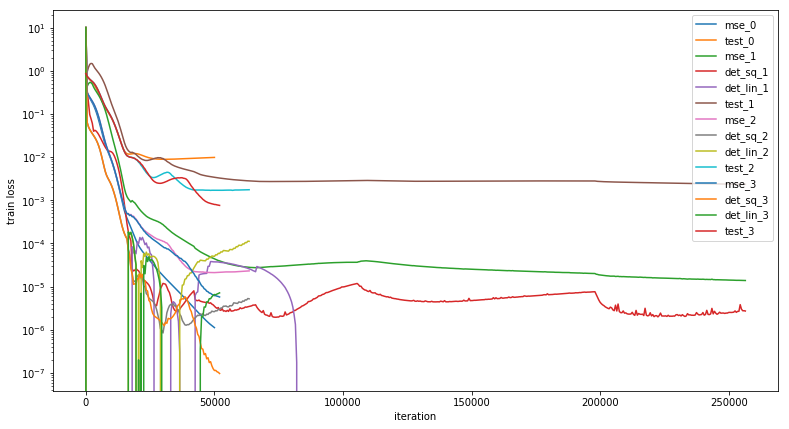

In [5]:
path0 = 'tmp_orig/final.pkl'
path1 = 'tmp/best.pkl'
path2 = 'tmp2/final.pkl'
path3 = 'tmp3/final.pkl'
paths = [path0, path1, path2, path3]
labels = list(range(len(paths)))
plot_train_loss(dim, paths, labels=labels, includeTest=True)

In [4]:
dim = 2
n_train = 17
train_seed = 1683
loss_fn = [{'loss_fn': lossfn.get_mse_loss(), 'weight': 1, 'label': 'mse'},
          {'loss_fn': lossfn.get_det_loss(), 'weight': 10, 'label': 'norm'},]
run_experiment(dim, n_train, train_seed, loss_fn, 0, 'tmp/', iterations=50000, lr=5e-5, n_test=4096)


Model save: tmp_norm_10/best.pkl
Epoch 0	Iteration 0
Train score = 10.0	Test score = 0.8637702465057373
Epoch 200	Iteration 200
Train score = 2.303720235824585	Test score = 1.2093168497085571
Epoch 400	Iteration 400
Train score = 1.2970410585403442	Test score = 1.554345965385437
Epoch 600	Iteration 600
Train score = 1.124717354774475	Test score = 1.7295341491699219
Epoch 800	Iteration 800
Train score = 1.081507921218872	Test score = 1.7900301218032837
Epoch 1000	Iteration 1000
Train score = 1.0577062368392944	Test score = 1.8093559741973877
Epoch 1200	Iteration 1200
Train score = 1.0408416986465454	Test score = 1.8161574602127075
Epoch 1400	Iteration 1400
Train score = 1.0268882513046265	Test score = 1.8173331022262573
Epoch 1600	Iteration 1600
Train score = 1.013571858406067	Test score = 1.8148399591445923
Epoch 1800	Iteration 1800
Train score = 0.9995802640914917	Test score = 1.8097225427627563
Epoch 2000	Iteration 2000
Train score = 0.984148383140564	Test score = 1.8026238679885864


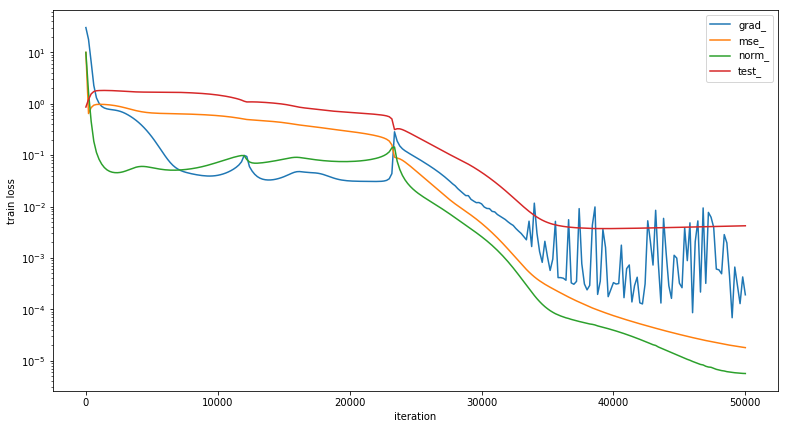

In [7]:
path0 = 'tmp_orig/final.pkl'
path1 = 'tmp_norm/final.pkl'
path2 = 'tmp_norm_10/final.pkl'
path3 = 'tmp_norm_5/final.pkl'
paths = [path2]
plot_train_loss(dim, paths, includeTest=True)

In [10]:
dim = 2
n_train = 17
train_seed = 1683
loss_fn = [{'loss_fn': lossfn.get_mse_loss(), 'weight': 1, 'label': 'mse'},]
run_experiment(dim, n_train, train_seed, loss_fn, 0, 'tmp_orig/', iterations=50000, lr=5e-5, n_test=4096)


Model save: tmp_orig/best.pkl
Epoch 0	Iteration 0
Train score = 10.0	Test score = 0.8620283007621765
Model save: tmp_orig/best.pkl
Epoch 200	Iteration 200
Train score = 0.35813555121421814	Test score = 0.7788187861442566
Model save: tmp_orig/best.pkl
Epoch 400	Iteration 400
Train score = 0.32272765040397644	Test score = 0.7553512454032898
Model save: tmp_orig/best.pkl
Epoch 600	Iteration 600
Train score = 0.2994343936443329	Test score = 0.7316080331802368
Model save: tmp_orig/best.pkl
Epoch 800	Iteration 800
Train score = 0.2810225486755371	Test score = 0.7057262063026428
Model save: tmp_orig/best.pkl
Epoch 1000	Iteration 1000
Train score = 0.2652773857116699	Test score = 0.6801390647888184
Model save: tmp_orig/best.pkl
Epoch 1200	Iteration 1200
Train score = 0.2513287663459778	Test score = 0.6564506888389587
Model save: tmp_orig/best.pkl
Epoch 1400	Iteration 1400
Train score = 0.2387259602546692	Test score = 0.6351496577262878
Model save: tmp_orig/best.pkl
Epoch 1600	Iteration 1600
Tr

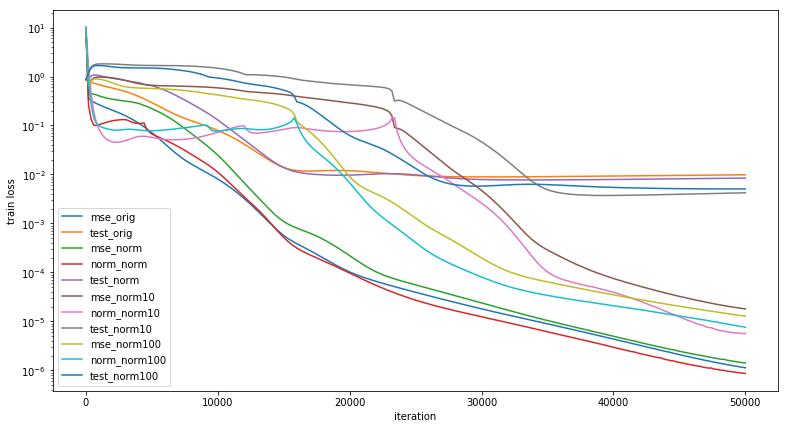

In [19]:
path0 = 'tmp_orig/final.pkl'
path1 = 'tmp_norm/final.pkl'
path2 = 'tmp_norm_10/final.pkl'
path3 = 'tmp_norm_5/final.pkl'
paths = [path0, path1, path2, path3]
plot_train_loss(dim, paths, labels=['orig', 'norm', 'norm10', 'norm100'], includeTest=True)

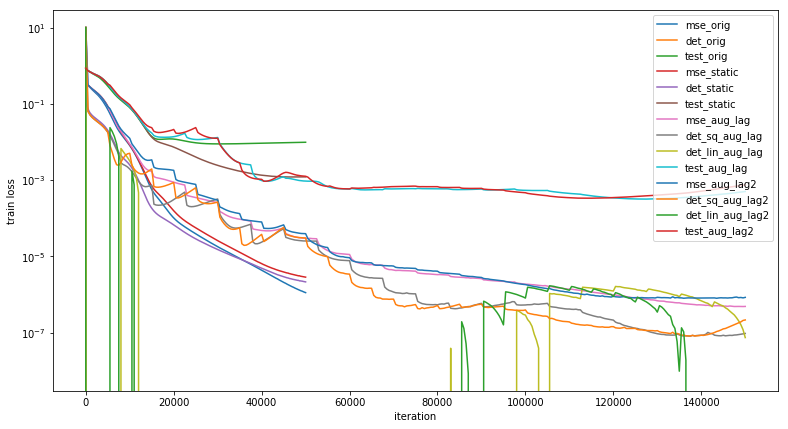

In [31]:
path0 = 'checkpoints/round2_detweight3/dim-{}_detweight-{}_ntrain-{}_seed-{}/final.pkl'.format(dim, 0, n_train, train_seed)
path1 = 'checkpoints/round2_detweight3/dim-{}_detweight-{}_ntrain-{}_seed-{}/final.pkl'.format(dim, 0.1, n_train, train_seed)
path2 = 'tmp2/final.pkl'
path3 = 'tmp3/final.pkl'
plot_train_loss(dim, [path0, path1, path2, path3], logscale=True, labels=["orig", "static", "aug_lag", "aug_lag2"], includeTest=True)

In [32]:
import os
os.system('say "your program has finished"')

0

In [27]:
dim = 2
n_train = 17
train_seed = 1683
loss_fns = [
    {'loss_fn': [{'loss_fn': lossfn.get_mse_loss(), 'weight': 1, 'label': 'mse'},
                {'loss_fn': lossfn.get_det_loss(), 'weight': 5e-2, 'label': 'det'}], 'iterations': 50000},
    {'loss_fn': [{'loss_fn': lossfn.get_mse_loss(), 'weight': 1, 'label': 'mse'},
                {'loss_fn': lossfn.get_det_loss(), 'weight': 1e-1, 'label': 'det'}], 'iterations': 50000},
    {'loss_fn': [{'loss_fn': lossfn.get_mse_loss(), 'weight': 1, 'label': 'mse'},
                {'loss_fn': lossfn.get_det_loss(), 'weight': 5e-1, 'label': 'det'}], 'iterations': 50000},
    {'loss_fn': [{'loss_fn': lossfn.get_mse_loss(), 'weight': 1, 'label': 'mse'},
                {'loss_fn': lossfn.get_det_loss(), 'weight': 1e0, 'label': 'det'}], 'iterations': 50000},
    {'loss_fn': [{'loss_fn': lossfn.get_mse_loss(), 'weight': 1, 'label': 'mse'},
                {'loss_fn': lossfn.get_det_loss(), 'weight': 5e0, 'label': 'det'}], 'iterations': 50000},
]
run_experiment_variable_loss(dim, [n_train]*len(loss_fns), [train_seed]*len(loss_fns), loss_fns, 0, 'tmp/', lr=5e-5, max_iterations=250000, n_test=4096)

Model save: tmp/best.pkl
Epoch 0	Iteration 0
Train score = 10.0	Test score = 0.8620061874389648
Model save: tmp/best.pkl
Epoch 500	Iteration 500
Train score = 0.3510909676551819	Test score = 0.7380127310752869
Model save: tmp/best.pkl
Epoch 1000	Iteration 1000
Train score = 0.3015117645263672	Test score = 0.6782057285308838
Model save: tmp/best.pkl
Epoch 1500	Iteration 1500
Train score = 0.26635828614234924	Test score = 0.6258298754692078
Model save: tmp/best.pkl
Epoch 2000	Iteration 2000
Train score = 0.237811878323555	Test score = 0.58609938621521
Model save: tmp/best.pkl
Epoch 2500	Iteration 2500
Train score = 0.2121514230966568	Test score = 0.5498719811439514
Model save: tmp/best.pkl
Epoch 3000	Iteration 3000
Train score = 0.18706932663917542	Test score = 0.5090585350990295
Model save: tmp/best.pkl
Epoch 3500	Iteration 3500
Train score = 0.16177718341350555	Test score = 0.46185654401779175
Model save: tmp/best.pkl
Epoch 4000	Iteration 4000
Train score = 0.1366269737482071	Test scor

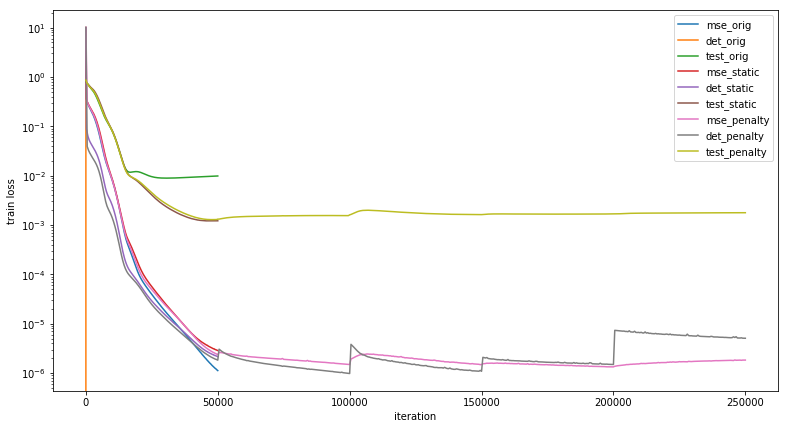

In [28]:
path0 = 'checkpoints/round2_detweight3/dim-{}_detweight-{}_ntrain-{}_seed-{}/final.pkl'.format(dim, 0, n_train, train_seed)
path1 = 'checkpoints/round2_detweight3/dim-{}_detweight-{}_ntrain-{}_seed-{}/final.pkl'.format(dim, 0.1, n_train, train_seed)
path2 = 'tmp/final.pkl'
plot_train_loss(dim, [path0, path1, path2], logscale=True, labels=["orig", "static", "penalty"], includeTest=True)

In [35]:
n_train = 15
train_seed = 1683
dim = 2
loss_fn = [{'loss_fn': lossfn.get_mse_loss(), 'weight': 1, 'label': 'mse'}]

In [37]:
def get_fn_det_normed(dim):
    def fn_det_normed(mats):
        scale_tensor = torch.ones(size=(mats.shape[0],))
        for i, mat in enumerate(mats):
            det = torch.det(mat.detach())
            if det > 0:
                scale_tensor[i] = det**(1./dim)
        scale_tensor = scale_tensor.view(scale_tensor.shape[0], -1)
        return (mats.view(mats.shape[0], -1) / scale_tensor).view(mats.shape[0], dim, dim)
    return fn_det_normed
run_experiment(dim, n_train, train_seed, loss_fn, 0, 'tmp_det_detached/', fn_matrix=get_fn_det_normed(dim), iterations=50000)

tensor([[1.0000],
        [0.2395],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [0.2663],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000]])
tensor([[1.0000],
        [1.0000],
        [0.2810],
        [1.0000],
        [1.0000],
        [0.2184],
        [1.0000],
        [0.2700],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [0.2882],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [0.2802],
        [1.0000],
        [0.2747],
        [1.0000],
        [1.0000],
        [0.2275],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [

KeyboardInterrupt: 

In [10]:
def fn_pred(pred):
    norms = torch.norm(pred.data, 2, 1)
    print(pred.data.size())
    print(norms.size())
    # print(norms.requires_grad)
    pred_normed = pred / norms.view(norms.shape[0], 1)
    # print(torch.norm(pred_normed.data, 2, 1))
    return pred_normed
run_experiment(dim, n_train, train_seed, loss_fn, 0, 'tmp_norm_detached/', fn_pred=fn_pred, iterations=50000)

torch.Size([15, 2])
torch.Size([15])
torch.Size([512, 2])
torch.Size([512])
Model save: tmp_norm_detached/best.pkl
Epoch 0	Iteration 0
Train score = 10.0	Test score = 1.3676669597625732
torch.Size([15, 2])
torch.Size([15])
torch.Size([15, 2])
torch.Size([15])
torch.Size([15, 2])
torch.Size([15])
torch.Size([15, 2])
torch.Size([15])
torch.Size([15, 2])
torch.Size([15])
torch.Size([15, 2])
torch.Size([15])
torch.Size([15, 2])
torch.Size([15])
torch.Size([15, 2])
torch.Size([15])
torch.Size([15, 2])
torch.Size([15])
torch.Size([15, 2])
torch.Size([15])
torch.Size([15, 2])
torch.Size([15])
torch.Size([15, 2])
torch.Size([15])
torch.Size([15, 2])
torch.Size([15])
torch.Size([15, 2])
torch.Size([15])
torch.Size([15, 2])
torch.Size([15])
torch.Size([15, 2])
torch.Size([15])
torch.Size([15, 2])
torch.Size([15])
torch.Size([15, 2])
torch.Size([15])
torch.Size([15, 2])
torch.Size([15])
torch.Size([15, 2])
torch.Size([15])
torch.Size([15, 2])
torch.Size([15])
torch.Size([15, 2])
torch.Size([15])


KeyboardInterrupt: 

In [ ]:
loss_fn = [{'loss_fn': lossfn.get_mse_loss(), 'weight': 1, 'label': 'mse'}]
def fn_pred(pred):
    norms = torch.norm(pred, 2, 1)
    pred_normed = pred / norms.view(norms.shape[0], 1)
    return pred_normed
run_experiment(dim, n_train, train_seed, loss_fn, 0, 'tmp_norm/', fn_pred=fn_pred, iterations=50000)

In [16]:
loss_fn = [{'loss_fn': lossfn.get_mse_loss(), 'weight': 1, 'label': 'mse'}]
def fn_pred(pred):
    return pred
run_experiment(dim, n_train, train_seed, loss_fn, 0, 'tmp_orig/', fn_pred=fn_pred, iterations=50000)

Model save: tmp_orig/best.pkl
Epoch 0	Iteration 0
Train score = 10.0	Test score = 0.862248957157135
Model save: tmp_orig/best.pkl
Epoch 200	Iteration 200
Train score = 0.13237184286117554	Test score = 0.5555287599563599
Model save: tmp_orig/best.pkl
Epoch 400	Iteration 400
Train score = 0.033725541085004807	Test score = 0.23344998061656952
Model save: tmp_orig/best.pkl
Epoch 600	Iteration 600
Train score = 0.014462009072303772	Test score = 0.13975496590137482
Model save: tmp_orig/best.pkl
Epoch 800	Iteration 800
Train score = 0.009095369838178158	Test score = 0.11325252056121826
Model save: tmp_orig/best.pkl
Epoch 1000	Iteration 1000
Train score = 0.006645549088716507	Test score = 0.09861721098423004
Model save: tmp_orig/best.pkl
Epoch 1200	Iteration 1200
Train score = 0.005138488486409187	Test score = 0.08594280481338501
Model save: tmp_orig/best.pkl
Epoch 1400	Iteration 1400
Train score = 0.0037884169723838568	Test score = 0.07224741578102112
Model save: tmp_orig/best.pkl
Epoch 1600	

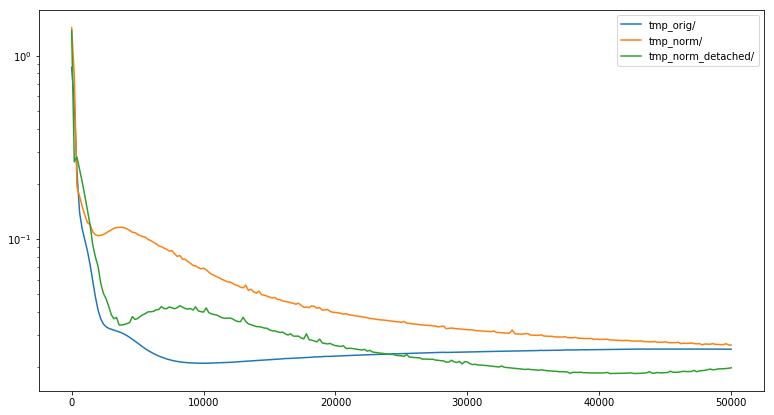

In [17]:
import os
plt.figure(figsize=(13,7))
for dir_name in ['tmp_orig/', 'tmp_norm/', 'tmp_norm_detached/']:
    model = Net(dim, n_hidden_layers=max(1, int(math.log(dim, 2))))
    solver = Solver(model)
    filepath = dir_name+'final.pkl'
    if os.path.exists(filepath):
        solver.load_checkpoint(filepath)
        plt.plot(solver.hist["iterations"], solver.hist["test_loss"], label=dir_name)
plt.legend()
plt.yscale('log')
plt.show()

In [10]:
n_train = 10
loss_fn = [{'loss_fn': lossfn.get_mse_loss(), 'weight': 1, 'label': 'mse'}]
def fn_pred(pred):
    norms = torch.norm(pred.data, 2, 1)
    pred_normed = pred / norms.view(norms.shape[0], 1)
    return pred_normed
run_experiment(dim, n_train, train_seed, loss_fn, 0, 'tmp_norm_detached/', fn_pred=fn_pred, iterations=50000)
loss_fn = [{'loss_fn': lossfn.get_mse_loss(), 'weight': 1, 'label': 'mse'}]
def fn_pred(pred):
    norms = torch.norm(pred, 2, 1)
    pred_normed = pred / norms.view(norms.shape[0], 1)
    return pred_normed
run_experiment(dim, n_train, train_seed, loss_fn, 0, 'tmp_norm/', fn_pred=fn_pred, iterations=50000)
loss_fn = [{'loss_fn': lossfn.get_mse_loss(), 'weight': 1, 'label': 'mse'}]
def fn_pred(pred):
    return pred
run_experiment(dim, n_train, train_seed, loss_fn, 0, 'tmp_orig/', fn_pred=fn_pred, iterations=50000)

Model save: tmp_norm_detached/best.pkl
Epoch 0	Iteration 0
Train score = 10.0	Test score = 1.3675910234451294
Model save: tmp_norm_detached/best.pkl
Epoch 200	Iteration 200
Train score = 0.3677222728729248	Test score = 1.0904532670974731
Model save: tmp_norm_detached/best.pkl
Epoch 400	Iteration 400
Train score = 0.062426019459962845	Test score = 0.7300651669502258
Epoch 600	Iteration 600
Train score = 0.055107973515987396	Test score = 0.8440266847610474
Model save: tmp_norm_detached/best.pkl
Epoch 800	Iteration 800
Train score = 0.05419165641069412	Test score = 0.5600447654724121
Epoch 1000	Iteration 1000
Train score = 0.0050981976091861725	Test score = 0.8085935115814209
Epoch 1200	Iteration 1200
Train score = 0.0007337231072597206	Test score = 0.8426744341850281
Epoch 1400	Iteration 1400
Train score = 0.0004531733284238726	Test score = 0.7748849987983704
Epoch 1600	Iteration 1600
Train score = 0.0003601294883992523	Test score = 0.7262656092643738
Epoch 1800	Iteration 1800
Train scor

n_train = 10


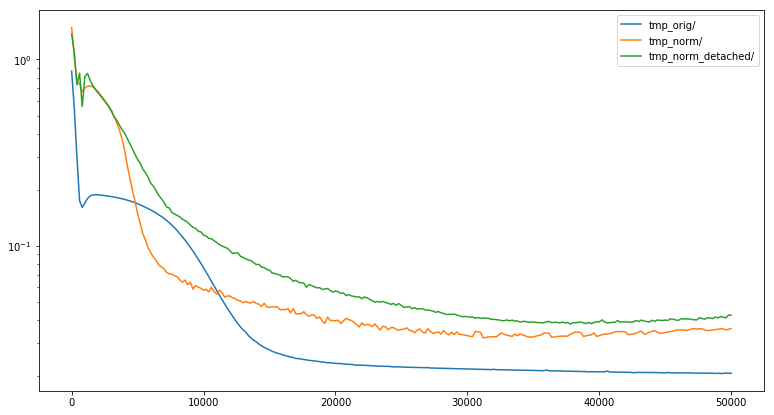

In [11]:
print("n_train = {}".format(n_train))
import os
plt.figure(figsize=(13,7))
for dir_name in ['tmp_orig/', 'tmp_norm/', 'tmp_norm_detached/']:
    model = Net(dim, n_hidden_layers=max(1, int(math.log(dim, 2))))
    solver = Solver(model)
    filepath = dir_name+'final.pkl'
    if os.path.exists(filepath):
        solver.load_checkpoint(filepath)
        plt.plot(solver.hist["iterations"], solver.hist["test_loss"], label=dir_name)
plt.legend()
plt.yscale('log')
plt.show()

In [5]:
n_train = 20
loss_fn = [{'loss_fn': lossfn.get_mse_loss(), 'weight': 1, 'label': 'mse'}]
def fn_pred(pred):
    norms = torch.norm(pred.data, 2, 1)
    pred_normed = pred / norms.view(norms.shape[0], 1)
    return pred_normed
run_experiment(dim, n_train, train_seed, loss_fn, 0, 'tmp_norm_detached/', fn_pred=fn_pred, iterations=50000)
loss_fn = [{'loss_fn': lossfn.get_mse_loss(), 'weight': 1, 'label': 'mse'}]
def fn_pred(pred):
    norms = torch.norm(pred, 2, 1)
    pred_normed = pred / norms.view(norms.shape[0], 1)
    return pred_normed
run_experiment(dim, n_train, train_seed, loss_fn, 0, 'tmp_norm/', fn_pred=fn_pred, iterations=50000)
loss_fn = [{'loss_fn': lossfn.get_mse_loss(), 'weight': 1, 'label': 'mse'}]
def fn_pred(pred):
    return pred
run_experiment(dim, n_train, train_seed, loss_fn, 0, 'tmp_orig/', fn_pred=fn_pred, iterations=50000)

Model save: tmp_norm_detached/best.pkl
Epoch 0	Iteration 0
Train score = 10.0	Test score = 1.3676668405532837
Model save: tmp_norm_detached/best.pkl
Epoch 200	Iteration 200
Train score = 0.011003516614437103	Test score = 0.1252775490283966
Model save: tmp_norm_detached/best.pkl
Epoch 400	Iteration 400
Train score = 0.005055136512964964	Test score = 0.05948921665549278
Model save: tmp_norm_detached/best.pkl
Epoch 600	Iteration 600
Train score = 0.0004109242872800678	Test score = 0.012917548418045044
Model save: tmp_norm_detached/best.pkl
Epoch 800	Iteration 800
Train score = 7.586983701912686e-05	Test score = 0.007031974382698536
Model save: tmp_norm_detached/best.pkl
Epoch 1000	Iteration 1000
Train score = 0.00180512061342597	Test score = 0.006744966842234135
Model save: tmp_norm_detached/best.pkl
Epoch 1200	Iteration 1200
Train score = 2.310278796358034e-05	Test score = 0.004981042817234993
Epoch 1400	Iteration 1400
Train score = 0.002177310176193714	Test score = 0.007497524376958609


n_train = 20


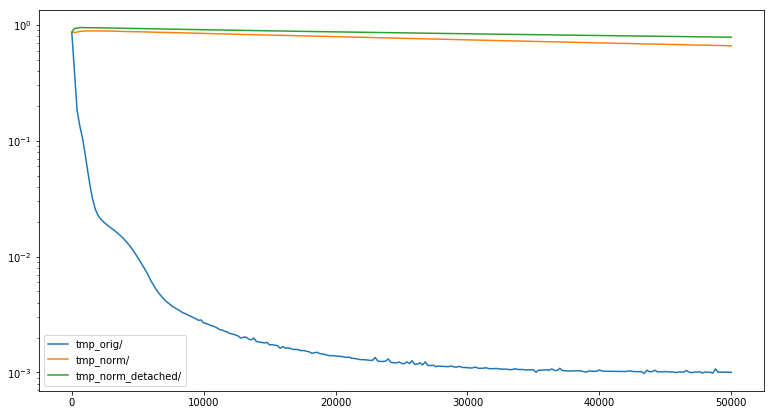

In [9]:
print("n_train = {}".format(n_train))
import os
plt.figure(figsize=(13,7))
for dir_name in ['tmp_orig/', 'tmp_norm/', 'tmp_norm_detached/']:
    model = Net(dim, n_hidden_layers=max(1, int(math.log(dim, 2))))
    solver = Solver(model)
    filepath = dir_name+'final.pkl'
    if os.path.exists(filepath):
        solver.load_checkpoint(filepath)
        plt.plot(solver.hist["iterations"], solver.hist["test_loss_no_fn"], label=dir_name)
plt.legend()
plt.yscale('log')
plt.show()

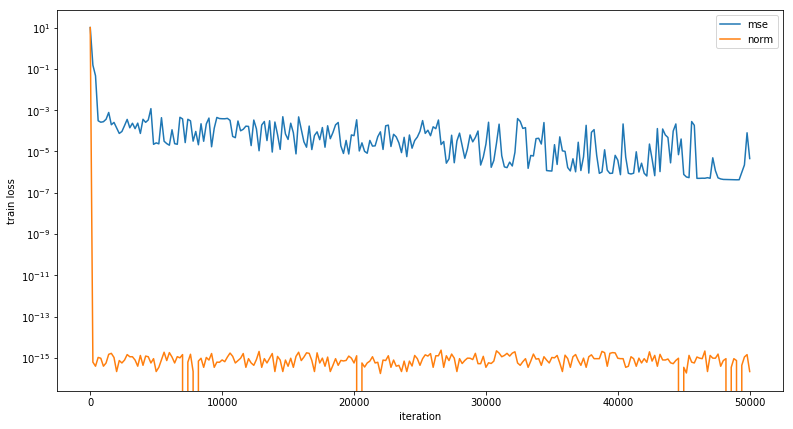

In [6]:
plt.figure(figsize=(13,7))
path = 'tmp/final.pkl'.format(0.5, 2, 10, 1683)
# Plot train loss
model = Net(dim, n_hidden_layers=max(1, int(math.log(dim, 2))))
solver = Solver(model)
solver.load_checkpoint(path)
for key in solver.hist["individual_train_losses"]:
    plt.plot(solver.hist["iterations"], solver.hist["individual_train_losses"][key], label=key)
plt.legend()
plt.yscale('log')
plt.ylabel("train loss")
plt.xlabel("iteration")
plt.show()

# def get_test_loader(dim, n_test=256):
    test_data = RotationDataset(dim, n_test, seed=SEED_TEST)
    return DataLoader(test_data)

In [4]:
"""
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='KoBstrtr', api_key='weMO837juuptFvlGjnXg')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p1 = []
p2 = []
p3 = []
for a_, b, c in get_test_loader(3, 1024):
    for a in a_:
        p1.append(a[0].item())
        p2.append(a[1].item())
        p3.append(a[2].item())
ax.scatter(p1, p2, p3, s=0.1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

x2, y2, z2 = p1, p2, p3
trace2 = go.Scatter3d(
    x=x2,
    y=y2,
    z=z2,
    mode='markers',
    marker=dict(
        color='rgb(127, 127, 127)',
        size=1,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
data = [trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')"""
_ = 1